In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 31.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=6519ef7d934f88234c99de9cf8408618709bef2134e747eb5efbd309e72d40d2
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


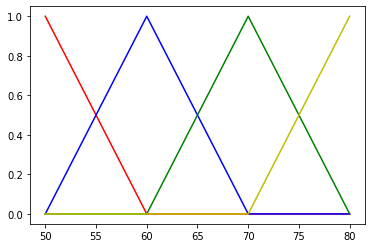

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt


x = np.arange(50,81,1) 

slow = fuzz.trimf(x,[50,50,60])

medium = fuzz.trimf(x,[50,60,70])

medium_fast = fuzz.trimf(x,[60,70,80])

full_speed = fuzz.trimf(x,[70,80,80])

plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')
plt.plot(x,medium,'b',linewidth=1.5,label='Medium')
plt.plot(x,medium_fast,'g',linewidth=1.5,label='Medium_Fast')
plt.plot(x,full_speed,'y',linewidth=1.5,label='Full_Speed')

Your tip is: 26.322857142857107


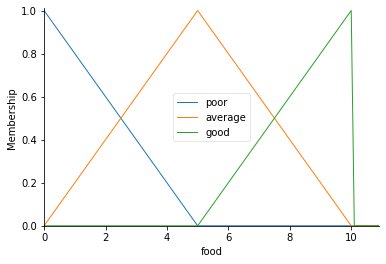

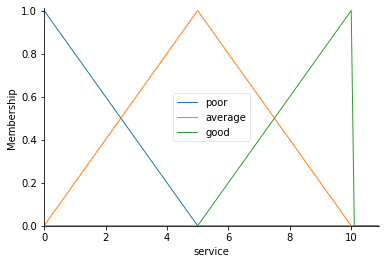

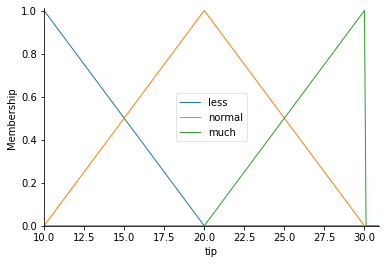

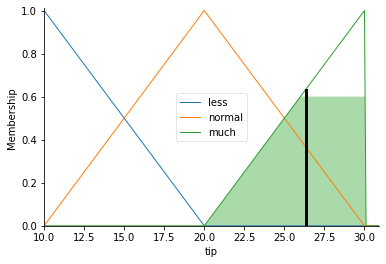

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 

#create input
food  = ctrl.Antecedent(np.arange(0,11,0.1),'food')
service = ctrl.Antecedent(np.arange(0,11,0.1),'service')

#output
tip = ctrl.Consequent(np.arange(10,31,0.1),'tip')

#create func
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,10,20])
tip['normal'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,30,30])

#view
food.view()
service.view()
tip.view()

#rule
rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['normal'])
rule4 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['normal'])
rule6 = ctrl.Rule(food['average']&service['good'],tip['much'])
rule7 = ctrl.Rule(food['good']&service['poor'],tip['normal'])
rule8 = ctrl.Rule(food['good']&service['average'],tip['much'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])

#compute
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 8
tipping.input['service'] = 10
tipping.compute()
print('Your tip is:', tipping.output['tip'])
tip.view(sim=tipping)

Time to cook is: 17 mins
The rice is: 1458 grams
Your power is: 88.58070175438604 %


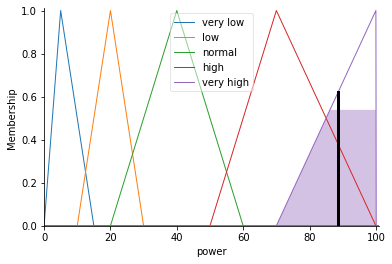

In [20]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random

time  = ctrl.Antecedent(np.arange(10,181,0.1),'time')

rice = ctrl.Antecedent(np.arange(100,2001,0.1),'rice')

power = ctrl.Consequent(np.arange(0,101,0.1),'power')

time['very fast'] = fuzz.trimf(time.universe,[10,12,20])
time['fast'] = fuzz.trimf(time.universe,[10,18,30])
time['normal'] = fuzz.trimf(time.universe,[20,45,70])
time['slow'] = fuzz.trimf(time.universe,[38,95,160])
time['very slow'] = fuzz.trimf(time.universe,[82,180,180])

rice['very less'] = fuzz.trimf(rice.universe,[95,100,200])
rice['less'] = fuzz.trimf(rice.universe,[100,197,296])
rice['normal'] = fuzz.trimf(rice.universe,[199,489,802])
rice['much'] = fuzz.trimf(rice.universe,[340,798,1899])
rice['very much'] = fuzz.trimf(rice.universe,[842,1986,2000])

power['very low'] = fuzz.trimf(power.universe,[0,5,15])
power['low'] = fuzz.trimf(power.universe,[10,20,30])
power['normal'] = fuzz.trimf(power.universe,[20,40,60])
power['high'] = fuzz.trimf(power.universe,[50,70,100])
power['very high'] = fuzz.trimf(power.universe,[70,100,100])


rule1 = ctrl.Rule(time['very fast']&rice['very less'],power['high'])
rule2 = ctrl.Rule(time['very fast']&rice['less'],power['high'])
rule3 = ctrl.Rule(time['very fast']&rice['normal'],power['very high'])
rule4 = ctrl.Rule(time['very fast']&rice['much'],power['very high'])
rule5 = ctrl.Rule(time['very fast']&rice['very much'],power['very high'])
rule6 = ctrl.Rule(time['fast']&rice['very less'],power['high'])
rule7 = ctrl.Rule(time['fast']&rice['less'],power['high'])
rule8 = ctrl.Rule(time['fast']&rice['normal'],power['very high'])
rule9 = ctrl.Rule(time['fast']&rice['much'],power['very high'])
rule10 = ctrl.Rule(time['fast']&rice['very much'],power['very high'])
rule11 = ctrl.Rule(time['normal']&rice['very less'],power['normal'])
rule12 = ctrl.Rule(time['normal']&rice['less'],power['normal'])
rule13 = ctrl.Rule(time['normal']&rice['normal'],power['normal'])
rule14 = ctrl.Rule(time['normal']&rice['much'],power['low'])
rule15 = ctrl.Rule(time['normal']&rice['very much'],power['low'])
rule16 = ctrl.Rule(time['slow']&rice['very less'],power['normal'])
rule17 = ctrl.Rule(time['slow']&rice['less'],power['normal'])
rule18 = ctrl.Rule(time['slow']&rice['normal'],power['low'])
rule19 = ctrl.Rule(time['slow']&rice['much'],power['very low'])
rule20 = ctrl.Rule(time['slow']&rice['very much'],power['very low'])
rule21 = ctrl.Rule(time['very slow']&rice['very less'],power['low'])
rule22 = ctrl.Rule(time['very slow']&rice['less'],power['low'])
rule23 = ctrl.Rule(time['very slow']&rice['normal'],power['very low'])
rule24 = ctrl.Rule(time['very slow']&rice['much'],power['very low'])
rule25 = ctrl.Rule(time['very slow']&rice['very much'],power['very low'])

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, 
                                   rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
a = random.randrange(10,181,1)
b = random.randrange(100,2001,1)
tipping.input['time'] = a
tipping.input['rice'] = b
tipping.compute()
print('Time to cook is:',a,'mins')
print('The rice is:',b,'grams')
print('Your power is:', tipping.output['power'],'%')
power.view(sim=tipping)